In [ ]:
#IDK why, but it has to be like this to run on my computer
!pip install giotto-tda

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
import gtda.mapper as mp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
import gtda.mapper as mp
import random
from sklearn.cluster import KMeans
import networkx as nx
import igraph as ig
from scipy.spatial.distance import cdist

In [ ]:
#Overlap Fraction vs. Interval Code/Graph
num_iterations = 100
overlap_fractions = np.arange(0.99, 0.999, 0.001)
average_connected_components = []


for overlap_frac in overlap_fractions:
    connected_components_counts = []
    for _ in range(num_iterations):
        x = np.random.uniform(0, 100)
        y1 = np.random.uniform(0, 10)
        y2 = np.random.uniform(0, 10)
        y3 = np.random.uniform(1000, 1450)

        data_y = [y1, y2, y3]
        data_x = [x, x, x]
        data = np.vstack((data_x, data_y)).T


        filter_func = mp.Projection(columns=[1])  # Define filter function
        cover = mp.CubicalCover(n_intervals=3, overlap_frac=overlap_frac)  # Define cover with current overlap
        clusterer = KMeans(n_clusters=1)  # Define clusterer

        # Initialise pipeline
        pipe = mp.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,
            clusterer=clusterer
        )


        graph = pipe.fit_transform(data)
        igraph_graph = graph


        num_connected_components = len(igraph_graph.clusters())
        connected_components_counts.append(num_connected_components)


    average = np.mean(connected_components_counts)
    average_connected_components.append((overlap_frac, average))


for overlap_frac, average in average_connected_components:
    print(f"Average number of connected components for overlap fraction {overlap_frac:.2f}: {average}")


overlap_values, averages = zip(*average_connected_components)
plt.plot(overlap_values, averages, marker='o')
plt.title('Average Number of Connected Components vs. Overlap Fraction')
plt.xlabel('Overlap Fraction')
plt.ylabel('Average Number of Connected Components')
plt.grid()
plt.show()

Streaming output truncated to the last 5000 lines.
<ipython-input-3-bbb5ec86ff77>:41: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  num_connected_components = len(igraph_graph.clusters())
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

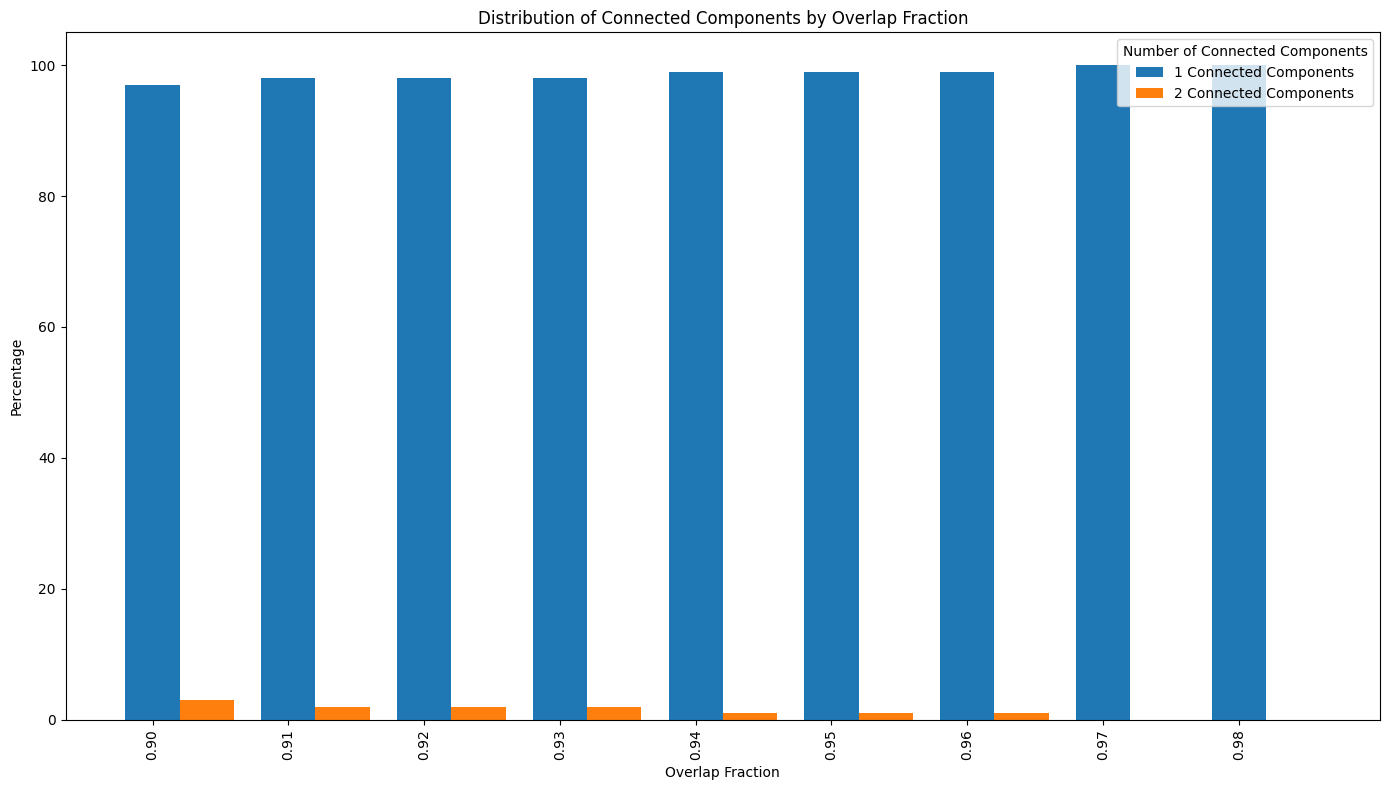

In [ ]:
#Naive Connected Component Analyzer for Triangle Construction with varying Intervals
num_iterations = 100
overlap_fractions = np.arange(0.90, 0.99, 0.01)


data_points = []
for _ in range(num_iterations):
    x = np.random.uniform(0, 100)
    y1 = np.random.uniform(0, 1450)
    y2 = np.random.uniform(0, 1450)
    y3 = np.random.uniform(1000, 1450)



    data_y = [y1, y2, y3, y4, y5, y6]
    data_x = [x, x, x, x, x, x]
    data_points.append(np.vstack((data_x, data_y)).T)

connected_components_counts_per_overlap = {overlap_frac: {} for overlap_frac in overlap_fractions}


for overlap_frac in overlap_fractions:
    for data in data_points:
        filter_func = mp.Projection(columns=[1]) #Define filter function
        cover = mp.CubicalCover(n_intervals=3, overlap_frac=overlap_frac) #Define cover with current overlap
        clusterer = KMeans(n_clusters=1) #Define clusterer

       # Initialise pipeline
        pipe = mp.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,
            clusterer=clusterer
        )

        graph = pipe.fit_transform(data)
        igraph_graph = graph


        num_connected_components = len(igraph_graph.clusters())

        if num_connected_components not in connected_components_counts_per_overlap[overlap_frac]:
            connected_components_counts_per_overlap[overlap_frac][num_connected_components] = 0
        connected_components_counts_per_overlap[overlap_frac][num_connected_components] += 1

# Calculate percentages
all_component_values = sorted(
    {components for counts in connected_components_counts_per_overlap.values() for components in counts}
)
percentages_per_overlap = {overlap_frac: [] for overlap_frac in overlap_fractions}

for overlap_frac in overlap_fractions:
    total_counts = sum(connected_components_counts_per_overlap[overlap_frac].values())
    for components in all_component_values:
        count = connected_components_counts_per_overlap[overlap_frac].get(components, 0)
        percentages_per_overlap[overlap_frac].append(count / total_counts * 100)  # Convert to percentage

# Plot the results
x = np.arange(len(overlap_fractions))  # Bar positions for each overlap fraction
bar_width = 0.8 / len(all_component_values)  # Divide space for each bar group

plt.figure(figsize=(14, 8))

for i, components in enumerate(all_component_values):
    percentages = [percentages_per_overlap[overlap_frac][i] for overlap_frac in overlap_fractions]
    plt.bar(
        x + i * bar_width,  # Offset each group by bar_width
        percentages,
        bar_width,
        label=f"{components} Connected Components"
    )

# Customize the plot
plt.title("Distribution of Connected Components by Overlap Fraction")
plt.xlabel("Overlap Fraction")
plt.ylabel("Percentage")
plt.xticks(x, labels=[f"{frac:.2f}" for frac in overlap_fractions], rotation=90)
plt.legend(title="Number of Connected Components")
plt.tight_layout()
plt.show()


In [ ]:
#Uses 2-D Circle Data, and DBSCAN as clusterer
data_points = []
circle_radius = 100
num_iterations = 50
overlap_fractions = np.arange(0.01, 0.99, 0.01)

for _ in range(num_iterations):
    num_points = 100
    r = np.sqrt(np.random.uniform(0, 1, num_points)) * circle_radius
    theta = np.random.uniform(0, 2 * np.pi, num_points)

    x = r * np.cos(theta)
    y = r * np.sin(theta)


    data_points.append(np.vstack((x, y)).T)


connected_components_counts_per_overlap = {overlap_frac: {} for overlap_frac in overlap_fractions}


for overlap_frac in overlap_fractions:
    for data in data_points:

        filter_func = mp.Projection(columns=[0, 1]) #Define filter function
        cover = mp.CubicalCover(n_intervals=2, overlap_frac=overlap_frac) #Define cover with current overlap
        clusterer = DBSCAN(eps=2, min_samples=2) #Define clusterer

        # Initialise pipeline
        pipe = mp.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,
            clusterer=clusterer
        )

        graph = pipe.fit_transform(data)
        igraph_graph = graph


        num_connected_components = len(igraph_graph.clusters())

        if num_connected_components not in connected_components_counts_per_overlap[overlap_frac]:
            connected_components_counts_per_overlap[overlap_frac][num_connected_components] = 0
        connected_components_counts_per_overlap[overlap_frac][num_connected_components] += 1

# Calculate percentages
all_component_values = sorted(
    {components for counts in connected_components_counts_per_overlap.values() for components in counts}
)
percentages_per_overlap = {overlap_frac: [] for overlap_frac in overlap_fractions}

for overlap_frac in overlap_fractions:
    total_counts = sum(connected_components_counts_per_overlap[overlap_frac].values())
    for components in all_component_values:
        count = connected_components_counts_per_overlap[overlap_frac].get(components, 0)
        percentages_per_overlap[overlap_frac].append(count / total_counts * 100)  # Convert to percentage

# Plot the results
x = np.arange(len(overlap_fractions))  # Bar positions for each overlap fraction
bar_width = 0.8 / len(all_component_values)  # Divide space for each bar group

plt.figure(figsize=(14, 8))

for i, components in enumerate(all_component_values):
    percentages = [percentages_per_overlap[overlap_frac][i] for overlap_frac in overlap_fractions]
    plt.bar(
        x + i * bar_width,  # Offset each group by bar_width
        percentages,
        bar_width,
        label=f"{components} Connected Components"
    )

# Customize the plot
plt.title("Distribution of Connected Components by Overlap Fraction")
plt.xlabel("Overlap Fraction")
plt.ylabel("Percentage")
plt.xticks(x, labels=[f"{frac:.2f}" for frac in overlap_fractions], rotation=90)
plt.legend(title="Number of Connected Components")
plt.tight_layout()
plt.show()

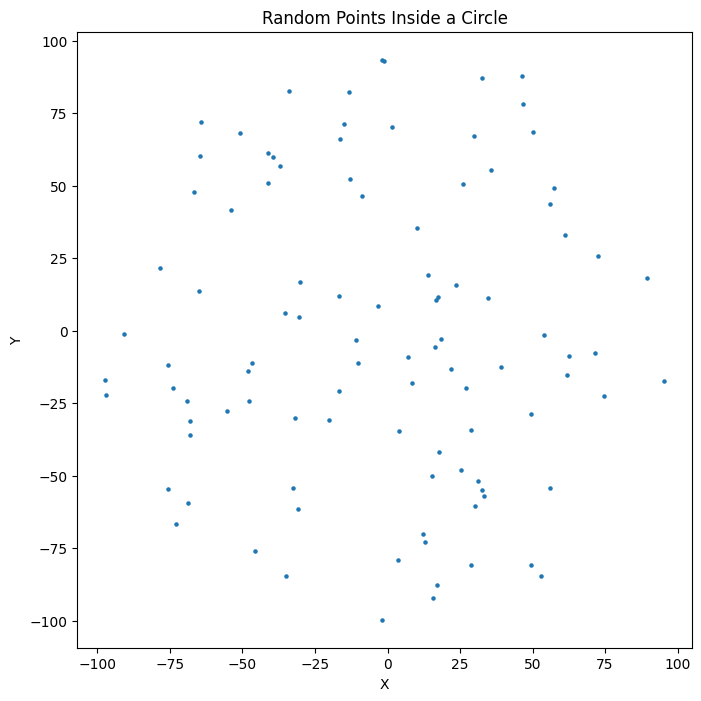

In [ ]:
 import matplotlib.pyplot as plt


sample_data = data_points[0]

plt.figure(figsize=(8, 8))
plt.scatter(sample_data[:, 0], sample_data[:, 1], s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Random Points Inside a Circle")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-5-102eaa3ed88a>:34: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  num_connected_components = len(igraph_graph.clusters())
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

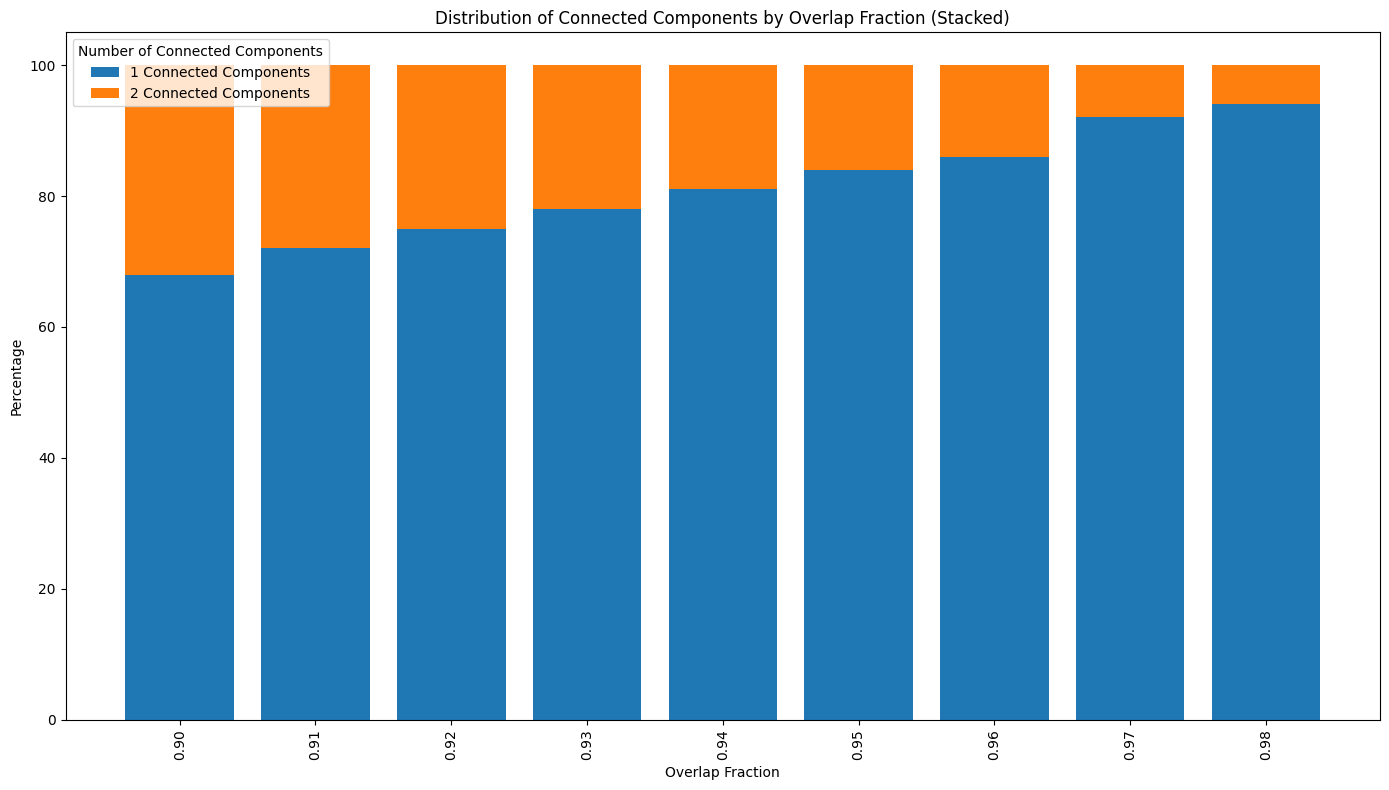

In [ ]:
random.seed(1287)
num_iterations = 100
overlap_fractions = np.arange(0.90, 0.99, 0.01)

data_points = []
for _ in range(num_iterations):
    x = np.random.uniform(0, 100)
    y1 = np.random.uniform(0, 1450)
    y2 = np.random.uniform(0, 1450)
    y3 = np.random.uniform(1000, 1450)

    data_y = [y1, y2, y3]
    data_x = [x, x, x]
    data_points.append(np.vstack((data_x, data_y)).T)

connected_components_counts_per_overlap = {overlap_frac: {} for overlap_frac in overlap_fractions}

for overlap_frac in overlap_fractions:
    for data in data_points:
        filter_func = mp.Projection(columns=[1])  # Define filter function
        cover = mp.CubicalCover(n_intervals=3, overlap_frac=overlap_frac)  # Define cover with current overlap
        clusterer = KMeans(n_clusters=1)  # Define clusterer

        # Initialize pipeline
        pipe = mp.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,
            clusterer=clusterer
        )

        graph = pipe.fit_transform(data)
        igraph_graph = graph

        num_connected_components = len(igraph_graph.clusters())

        if num_connected_components not in connected_components_counts_per_overlap[overlap_frac]:
            connected_components_counts_per_overlap[overlap_frac][num_connected_components] = 0
        connected_components_counts_per_overlap[overlap_frac][num_connected_components] += 1

# Calculate percentages
all_component_values = sorted(
    {components for counts in connected_components_counts_per_overlap.values() for components in counts}
)
percentages_per_overlap = {overlap_frac: [] for overlap_frac in overlap_fractions}

for overlap_frac in overlap_fractions:
    total_counts = sum(connected_components_counts_per_overlap[overlap_frac].values())
    for components in all_component_values:
        count = connected_components_counts_per_overlap[overlap_frac].get(components, 0)
        percentages_per_overlap[overlap_frac].append(count / total_counts * 100)  # Convert to percentage

# Plot the results as a stacked bar chart
x = np.arange(len(overlap_fractions))  # Bar positions for each overlap fraction

# Create a cumulative list to manage stacking
cumulative = np.zeros(len(overlap_fractions))

plt.figure(figsize=(14, 8))

# Plot each component count as a stacked segment
for i, components in enumerate(all_component_values):
    percentages = [percentages_per_overlap[overlap_frac][i] for overlap_frac in overlap_fractions]
    plt.bar(
        x,  # Keep the same x position
        percentages,
        bottom=cumulative,  # Start this segment on top of the previous one
        label=f"{components} Connected Components"
    )
    cumulative += percentages  # Update cumulative total for the next component

# Customize the plot
plt.title("Distribution of Connected Components by Overlap Fraction (Stacked)")
plt.xlabel("Overlap Fraction")
plt.ylabel("Percentage")
plt.xticks(x, labels=[f"{frac:.2f}" for frac in overlap_fractions], rotation=90)
plt.legend(title="Number of Connected Components")
plt.tight_layout()
plt.show()


In [ ]:
#Saving Data to CSV

random.seed(1287)
iteration_data = []
for _ in range(num_iterations):
    x = np.random.uniform(0, 100)
    y1 = np.random.uniform(0, 1450)
    y2 = np.random.uniform(0, 1450)
    y3 = np.random.uniform(1000, 1450)

    data_y = [y1, y2, y3]
    data_x = [x, x, x]
    data_points.append(np.vstack((data_x, data_y)).T)

    iteration_data.append({"x": x, "y1": y1, "y2": y2, "y3": y3})


iteration_df = pd.DataFrame(iteration_data)
iteration_df.to_csv("iteration_data.csv", index=False)

In [ ]:
#EDA for Distance Matrices

df = pd.read_csv('iteration_data.csv')
#Extracting points from csv
for index, row in df.iterrows():
    y1, y2, y3, x = row['y1'], row['y2'], row['y3'], row['x']

    #Distance Matrix construction
    points = np.array([[y1, x], [y2, x], [y3, x]])
    distance_matrix = np.linalg.norm(points[:, np.newaxis] - points, axis=2)

  #Maximum distance from each matrix
    max_distance = np.max(distance_matrix)
    max_distances.append(max_distance)

#Calculating average
average_max_distance = np.mean(max_distances)
variance_max_distance = np.var(max_distances)
standard_error_max_distance = np.std(max_distances) / np.sqrt(len(max_distances))
ci_lower = average_max_distance - 1.96 * standard_error_max_distance
ci_upper = average_max_distance + 1.96 * standard_error_max_distance

#Although a confidence interval doesn't make too much sense here, I imagine that one can you the CI bounds to construct
#more meaningful analysis and prediction for connected component prediction
print(f"Average of the Maximum Distances across all 100 iterations: {average_max_distance}")
print(f"Average Maximum Distance across all 100 iterations: {average_max_distance}")
print(f"Variance of Maximum Distances: {variance_max_distance}")
print(f"Standard Error of Maximum Distances: {standard_error_max_distance}")
print(f"95% Confidence Interval for the Mean Maximum Distance: ({ci_lower}, {ci_upper})")


#How can I utilize distance matrices for this
#i've calculated maximum distance for each iteration, and the average

Average of the Maximum Distances across all 100 iterations: 762.9357522027937
Average Maximum Distance across all 100 iterations: 762.9357522027937
Variance of Maximum Distances: 116007.10992814729
Standard Error of Maximum Distances: 15.232012994226816
95% Confidence Interval for the Mean Maximum Distance: (733.0810067341091, 792.7904976714782)
